In [3]:
import pandas as pd

df = pd.read_csv("analysis_id.csv")
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,date_hour,client,device_type,time_zone,os_name,browser_name,ad_unit,size,bidder,bid_range,...,sum_time_to_respond,median,min_bid,max_bid,avg_bid,sum_2nd_highest_bid,sum_prebid_winning_bid,sum_winning_bid,sum_nobid,sum_timeout
0,2021-04-11T01:00:00,asc126828,Desktop,America/Chicago,Linux,Chrome-85.04183133,div-gpt-ad-BT-D-Footers,728x90,onemobile,0.5-0.6,...,6614.0,NaN,0.58520,0.58520,0.585200,0.5852,0.5852,NaN,NaN,NaN
1,2021-04-11T01:00:00,asc126828,Desktop,America/Chicago,Linux,Chrome-85.04183133,div-gpt-ad-BT-D-Footers,728x90,rhythmone,0.3-0.4,...,5171.0,NaN,0.33945,0.34875,0.344100,NaN,NaN,NaN,NaN,NaN
2,2021-04-11T01:00:00,asc126828,Desktop,America/Chicago,Linux,Chrome-85.04183133,div-gpt-ad-BT-D-InLine-1,300x250,undertone,0.9-1,...,1523.0,NaN,0.96000,0.96000,0.960000,NaN,NaN,NaN,NaN,NaN
3,2021-04-11T01:00:00,asc126828,Desktop,America/Chicago,Linux,Chrome-85.04183133,div-gpt-ad-BT-D-O-300x250-1,300x250,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-04-11T01:00:00,asc126828,Desktop,America/Chicago,Linux,Chrome-85.04183133,div-gpt-ad-BT-D-O-300x250-1,300x250,rhythmone,0.3-0.4,...,3570.0,0.34875,0.34410,0.34875,0.346425,NaN,NaN,NaN,NaN,NaN


In [ ]:
# The above data is data for prebid auctions. There are bidders who receive requests for placing ads, they respond to these requests with a bid and the highest bid wins the auction. Analyse the dataset to answer which bidder has the highest win rate (wins / total_bid). 

In [5]:
df['bidder'].unique()

array(['onemobile', 'rhythmone', 'undertone', ' ', 'pulsepoint',
       'pubmatic', 'triplelift', 'sharethrough', 'ix', 'medianet',
       'appnexus', '33across', 'openx', 'emx_digital', 'rubicon',
       'criteo', 'sovrn', 'teads'], dtype=object)

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(5000, 26)

In [6]:
df[df['bidder']==' '].shape

(1210, 26)

In [8]:
df.columns

Index(['date_hour', 'client', 'device_type', 'time_zone', 'os_name',
       'browser_name', 'ad_unit', 'size', 'bidder', 'bid_range', 'media_type',
       'request_count', 'response_count', 'prebid_win_count', 'win_count',
       'sum_bid', 'sum_time_to_respond', 'median', 'min_bid', 'max_bid',
       'avg_bid', 'sum_2nd_highest_bid', 'sum_prebid_winning_bid',
       'sum_winning_bid', 'sum_nobid', 'sum_timeout'],
      dtype='object')

In [13]:
col_of_interest = ['bidder', 'request_count','prebid_win_count']

df2 = df[col_of_interest].drop_duplicates()
df2.shape

(888, 3)

In [19]:
df2 = df[df['bidder']!=" "]

In [21]:
df2['prebid_win_count'].isna().sum()

np.int64(2623)

In [ ]:
df_agg = df2.groupby('bidder').agg(sum_of_requests = ("request_count",'sum'), prebids_won = ("prebid_win_count",'sum'))
df_agg.head()

,sum_of_requests,prebids_won
bidder,,
33across,886,136.0
appnexus,830,175.0
criteo,3181,587.0
emx_digital,393,56.0
ix,3051,184.0


Question 1 answer:


In [ ]:
df_agg['win_rate'] = round(df_agg['prebids_won']/df_agg['sum_of_requests'],2)
df_agg['win_rate_per'] = round(df_agg['prebids_won']*100/df_agg['sum_of_requests'],2)

df_agg_sorted = df_agg.sort_values(by = 'win_rate', ascending=False)
df_agg_sorted.head()

,sum_of_requests,prebids_won,win_rate,win_rate_per
bidder,,,,
undertone,104,52.0,0.50,50.00
teads,700,323.0,0.46,46.14
pulsepoint,191,71.0,0.37,37.17
sharethrough,332,104.0,0.31,31.33
onemobile,2726,759.0,0.28,27.84


In [28]:
df_agg_sorted.head(2)

,sum_of_requests,prebids_won,win_rate,win_rate_per
bidder,,,,
undertone,104,52.0,0.50,50.00
teads,700,323.0,0.46,46.14


In [45]:
df3 = df2.select_dtypes(include=float)
df3['win_count'] = df3['win_count'].fillna(0)

In [46]:
df3['win_count'].value_counts()

win_count
0.0     3604
1.0      150
2.0       20
3.0        5
4.0        5
6.0        2
13.0       1
5.0        1
16.0       1
7.0        1
Name: count, dtype: int64

In [47]:
df3['win_count'] = df3['win_count'].astype(bool)
df3['win_count'] = df3['win_count'].astype(int)

In [39]:
import seaborn as sns

In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3790 entries, 0 to 4996
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   median     1760 non-null   float64
 1   avg_bid    3790 non-null   float64
 2   win_count  3790 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 118.4 KB


In [48]:
df3['median2'] = df3['median'].fillna(df3['avg_bid'])

<Axes: >

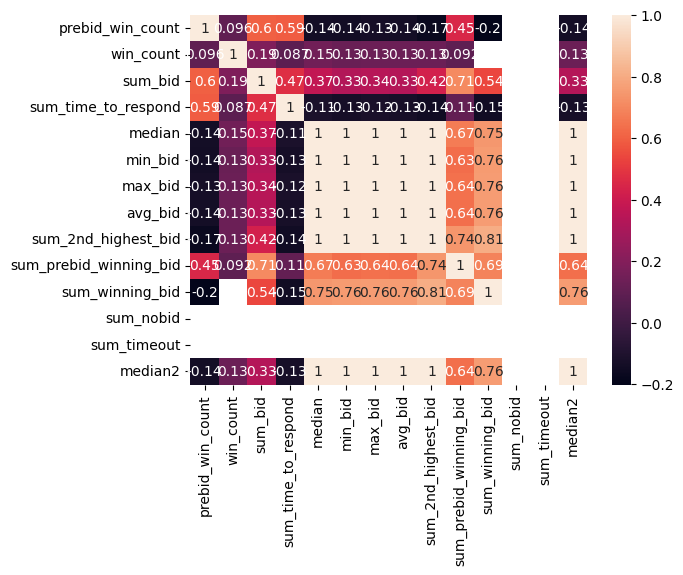

In [49]:
sns.heatmap(df3.corr(), annot=True)